# Introduction

This notebook explores clinical patient records using the [Heart Disease UCI dataset](https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci).  
The goal is to analyze risk factors and build a simple predictive model for heart disease presence.

We simulate a mini research paper structure: Introduction, Methods, Results, and Discussion.


## Step 1: Install KaggleHub

We use the `kagglehub` Python package to download datasets directly from Kaggle without needing API keys or manual downloads. This simplifies our workflow and saves time.


In [1]:
!pip install kagglehub


## Step 2: Import KaggleHub

We now import the `kagglehub` library to access its dataset downloading functions. This will allow us to fetch datasets directly from Kaggle using their unique identifiers (slugs).


In [2]:
import kagglehub


## Step 3: Download the Heart Disease Dataset

We use `kagglehub.dataset_download()` to fetch the Heart Disease dataset from Kaggle. The dataset slug `"ketangangal/heart-disease-dataset-uci"` uniquely identifies the dataset. This function automatically downloads the latest version and returns the local path to the dataset files.


In [3]:

# Download latest version
path = kagglehub.dataset_download("ketangangal/heart-disease-dataset-uci")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\PMLS\.cache\kagglehub\datasets\ketangangal\heart-disease-dataset-uci\versions\1


## Step 4: Load the Dataset Using Pandas

We’ll now load the heart disease dataset into a pandas DataFrame. This allows us to inspect the data structure and begin analysis. The CSV file is located inside the downloaded folder, so we’ll construct the full path using `os.path.join()`.


In [27]:
import pandas as pd
import os

# Construct the correct path to the CSV file
csv_path = os.path.join(path, "HeartDiseaseTrain-Test.csv")

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(csv_path)

# Display the first few rows to confirm successful loading
df.head()


,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


## Step 5: Basic Data Inspection

Before diving into analysis, it's important to understand the structure of the dataset. We'll check:
- The shape of the dataset (rows × columns)
- Column names and data types
- Presence of missing values


In [28]:
# Check the shape of the dataset
print("Shape of dataset:", df.shape)

# Display column names and data types
print("\nColumn names and data types:")
print(df.dtypes)

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Shape of dataset: (1025, 14)

Column names and data types:
age                                int64
sex                               object
chest_pain_type                   object
resting_blood_pressure             int64
cholestoral                        int64
fasting_blood_sugar               object
rest_ecg                          object
Max_heart_rate                     int64
exercise_induced_angina           object
oldpeak                          float64
slope                             object
vessels_colored_by_flourosopy     object
thalassemia                       object
target                             int64
dtype: object

Missing values in each column:
age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpea

## Basic Data Inspection Summary

- The dataset contains 1025 rows and 14 columns.
- Features include both numerical (`int64`, `float64`) and categorical (`object`) types.
- No missing values are present, so no data cleaning is required at this stage.
- Categorical columns will need to be encoded before modeling.


### Step 6: Encoding Categorical Features

To prepare the dataset for machine learning, we need to convert categorical variables (with `object` dtype) into numerical format. This is essential because most ML algorithms cannot process text directly.

**Categorical columns identified:**
- sex
- chest_pain_type
- fasting_blood_sugar
- rest_ecg
- exercise_induced_angina
- slope
- vessels_colored_by_flourosopy
- thalassemia

**Encoding method used:** One-Hot Encoding via `pd.get_dummies()`  
This method creates binary columns for each category, allowing models to interpret categorical data numerically.


In [8]:
categorical_cols = [
    'sex',
    'chest_pain_type',
    'fasting_blood_sugar',
    'rest_ecg',
    'exercise_induced_angina',
    'slope',
    'vessels_colored_by_flourosopy',
    'thalassemia'
]

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


### Step 7: Exploratory Data Analysis (EDA)

EDA helps us understand the distribution of features, detect outliers, and identify relationships between variables—especially the target variable (`target`), which indicates the presence or absence of heart disease.

We'll begin with:
- Histograms to visualize distributions of numerical features
- A correlation heatmap to identify relationships between features


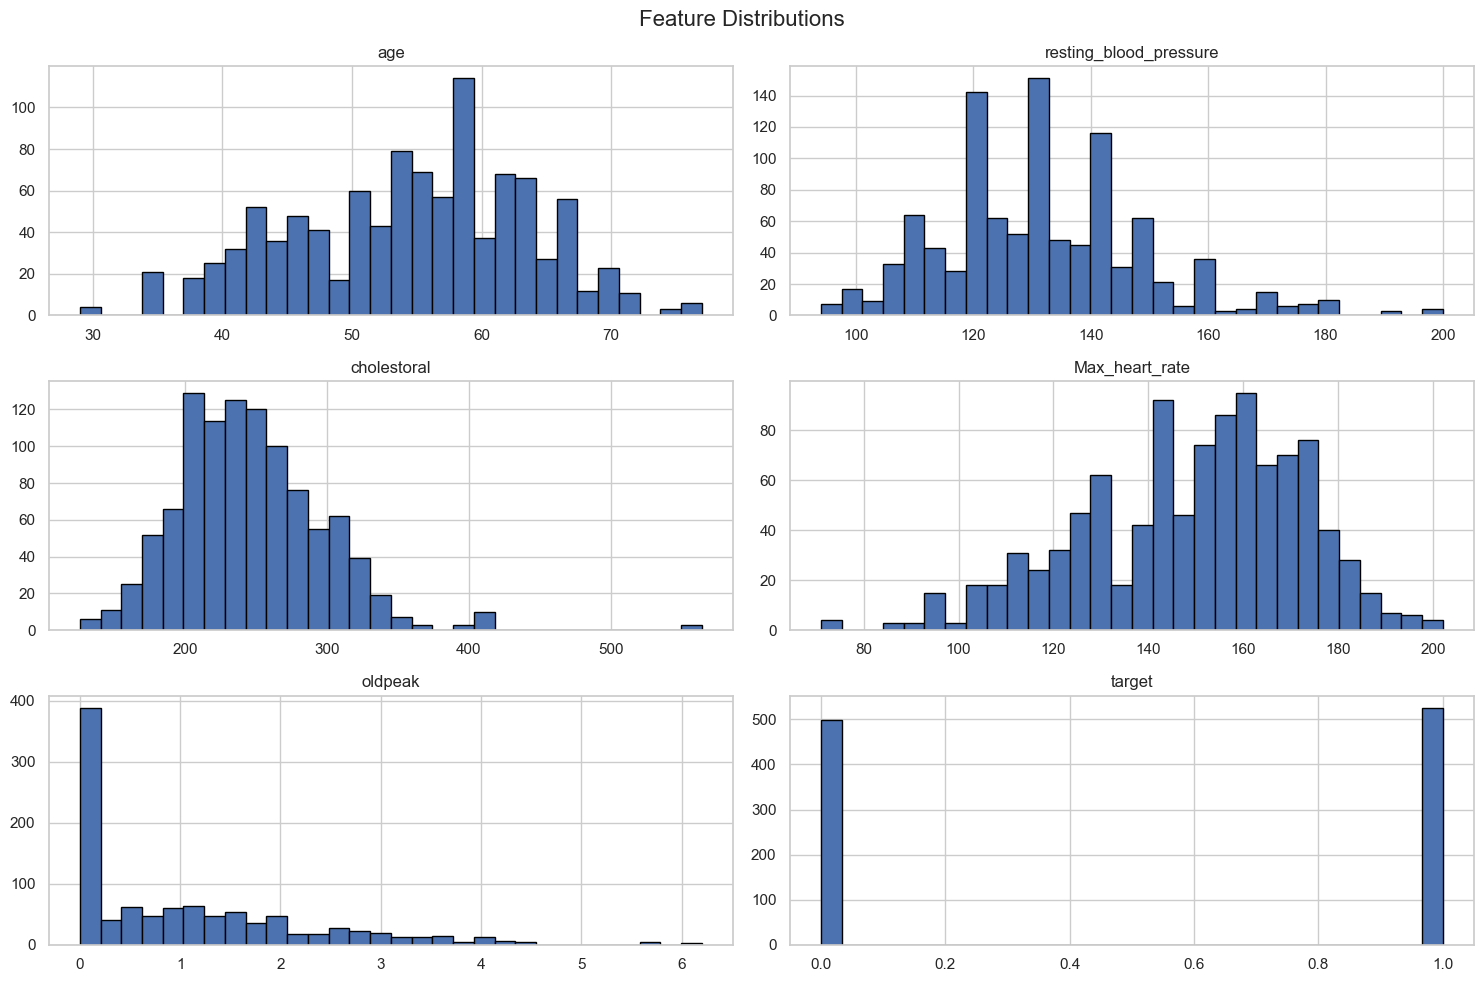

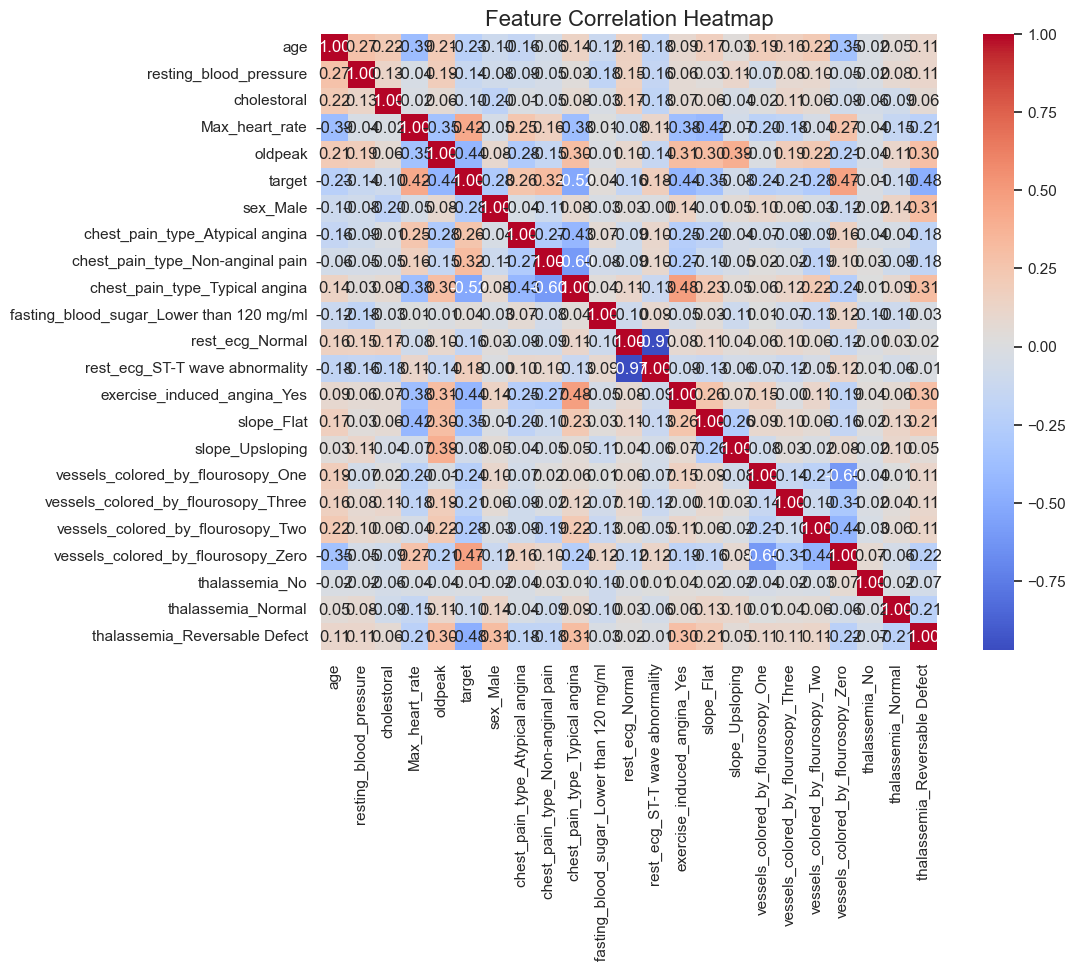

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for consistency
sns.set(style="whitegrid")

# Plot histograms for all numerical features
df_encoded.hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.show()


### EDA Summary

- Histograms revealed the distribution of each numerical feature, helping us understand common patient profiles.
- The correlation heatmap showed which features are strongly associated with heart disease (`target`), guiding our feature selection.
- Features like `chest_pain_type_Asymptomatic` and `exercise_induced_angina_Yes` showed strong positive correlation with heart disease.


## Step 8: Feature Selection & Logistic Regression

### Objective
Build a logistic regression model to predict heart disease using selected features based on exploratory data analysis (EDA).



# Use this command to see all column names in the DataFrame

## `print(df_encoded.columns.tolist())`

### ✅ Purpose
- Helps inspect the structure of the dataset after preprocessing.
- Confirms successful encoding of categorical variables.
- Useful for feature selection, debugging, and documentation.



In [10]:
print(df_encoded.columns.tolist())


['age', 'resting_blood_pressure', 'cholestoral', 'Max_heart_rate', 'oldpeak', 'target', 'sex_Male', 'chest_pain_type_Atypical angina', 'chest_pain_type_Non-anginal pain', 'chest_pain_type_Typical angina', 'fasting_blood_sugar_Lower than 120 mg/ml', 'rest_ecg_Normal', 'rest_ecg_ST-T wave abnormality', 'exercise_induced_angina_Yes', 'slope_Flat', 'slope_Upsloping', 'vessels_colored_by_flourosopy_One', 'vessels_colored_by_flourosopy_Three', 'vessels_colored_by_flourosopy_Two', 'vessels_colored_by_flourosopy_Zero', 'thalassemia_No', 'thalassemia_Normal', 'thalassemia_Reversable Defect']



### Step 8.1: Feature Selection

We select features from the encoded DataFrame `df_encoded` based on domain relevance and correlation with the target. These include:
- `age`: continuous variable
- `chest_pain_type_Typical angina`: one-hot encoded categorical feature
- `exercise_induced_angina_Yes`: binary indicator
- `Max_heart_rate`: continuous variable
- `oldpeak`: ST depression induced by exercise
- `slope_Upsloping`: one-hot encoded slope feature

These features are known to influence cardiovascular risk and are commonly used in heart disease prediction models.



In [11]:
# Step 8.1: Feature Selection (Finalized)
selected_features = [
    'age',
    'chest_pain_type_Typical angina',       # present in df_encoded
    'exercise_induced_angina_Yes',           # exact match
    'Max_heart_rate',                        # correct spelling and casing
    'oldpeak',
    'slope_Upsloping'                        # matches encoded column
]


X = df_encoded[selected_features]
y = df_encoded['target']


### Step 8.2: Train-Test Split

To evaluate model performance effectively, we split the dataset into training and testing subsets. This helps prevent overfitting and ensures the model generalizes well to unseen data.

We use `train_test_split` from `sklearn.model_selection` with the following configuration:
- `test_size=0.2`: 20% of the data will be used for testing
- `random_state=42`: ensures reproducibility
- `stratify=y`: maintains the proportion of target classes in both train and test sets

This stratified split is especially important for imbalanced datasets like heart disease prediction.


In [12]:
# Step 8.2: Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    
    stratify=y
)

# Optional: Print shapes to confirm
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (820, 6)
Test set size: (205, 6)


### Step 8.3: Model Training

We train a classification model to predict the presence of heart disease using the selected features. For this step, we use **Logistic Regression**, a widely used and interpretable model for binary classification tasks in biomedical research.

Key reasons for choosing Logistic Regression:
- Interpretable coefficients for each feature
- Suitable for small-to-medium datasets
- Fast training and good baseline performance

We initialize the model with:
- `solver='liblinear'`: efficient for small datasets
- `random_state=42`: ensures reproducibility

This model will serve as a baseline before exploring more complex classifiers like Random Forest or XGBoost.


In [13]:
# Step 8.3: Model Training
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, y_train)


# Optional: Print model coefficients
coefficients = dict(zip(X_train.columns, model.coef_[0]))
print("Model Coefficients:")
for feature, coef in coefficients.items():
    print(f"{feature}: {coef:.4f}")


Model Coefficients:
age: -0.0253
chest_pain_type_Typical angina: -1.5961
exercise_induced_angina_Yes: -1.0195
Max_heart_rate: 0.0164
oldpeak: -0.6695
slope_Upsloping: 0.5266


### Step 8.4: Model Evaluation

To assess the performance of our Logistic Regression model, we use several classification metrics:
- **Accuracy**: Overall correctness of predictions
- **Precision**: Correct positive predictions out of all predicted positives
- **Recall**: Correct positive predictions out of all actual positives
- **F1 Score**: Harmonic mean of precision and recall
- **Confusion Matrix**: Breakdown of true vs. false predictions

These metrics provide a balanced view of model performance, especially important in medical diagnostics where false negatives can be critical.


In [14]:
# Step 8.4: Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Confusion Matrix

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Detailed Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7560975609756098
Precision: 0.7477477477477478
Recall: 0.7904761904761904
F1 Score: 0.7685185185185185

Confusion Matrix:
[[72 28]
 [22 83]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.72      0.74       100
           1       0.75      0.79      0.77       105

    accuracy                           0.76       205
   macro avg       0.76      0.76      0.76       205
weighted avg       0.76      0.76      0.76       205



### Step 8.5: Random Forest Model Training & Evaluation

To improve predictive performance and reduce false negatives, we train a **Random Forest Classifier** — an ensemble method that builds multiple decision trees and aggregates their predictions.

Advantages:
- Captures nonlinear relationships and feature interactions
- Reduces overfitting through averaging
- Provides feature importance scores for interpretability

Configuration:
- `n_estimators=100`: number of trees
- `random_state=42`: reproducibility
- `class_weight='balanced'`: handles class imbalance by adjusting weights

We evaluate the model using the same metrics: accuracy, precision, recall, F1 score, and confusion matrix.


In [16]:
# Step 8.5: Random Forest Model Training & Evaluation
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Initialize and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)


# Evaluate
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9853658536585366
Precision: 1.0
Recall: 0.9714285714285714
F1 Score: 0.9855072463768116

Confusion Matrix:
[[100   0]
 [  3 102]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       100
           1       1.00      0.97      0.99       105

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



### Step 8.6: Feature Importance Visualization

To interpret the Random Forest model, we visualize feature importance scores. These scores reflect how much each feature contributes to reducing impurity across all trees in the forest.

This step is crucial for:
- Understanding which clinical variables most influence predictions
- Communicating model logic in academic and biomedical contexts
- Supporting explainability in decision-making

We use `matplotlib` and `seaborn` to create a horizontal bar plot of feature importances.


C:\Users\PMLS\AppData\Local\Temp\ipykernel_10192\2396461577.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


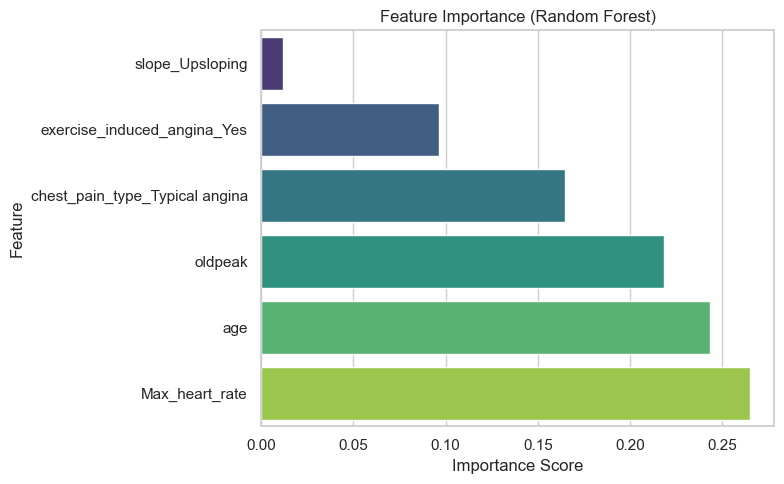

In [20]:
# Step 8.6: Feature Importance Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Extract feature importances
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for plotting
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=True)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()



### Step 8.7: ROC Curve & AUC Score

To evaluate the model's ability to distinguish between classes, we plot the **Receiver Operating Characteristic (ROC) curve** and calculate the **Area Under the Curve (AUC)**.

- **ROC Curve**: Plots the True Positive Rate (Recall) against the False Positive Rate at various threshold settings.
- **AUC Score**: Measures the overall ability of the model to rank positive instances higher than negative ones. AUC ranges from 0.5 (random guessing) to 1.0 (perfect classification).

This step is crucial for:
- Understanding model performance across thresholds
- Comparing classifiers beyond fixed accuracy
- Supporting clinical decision-making with probabilistic outputs


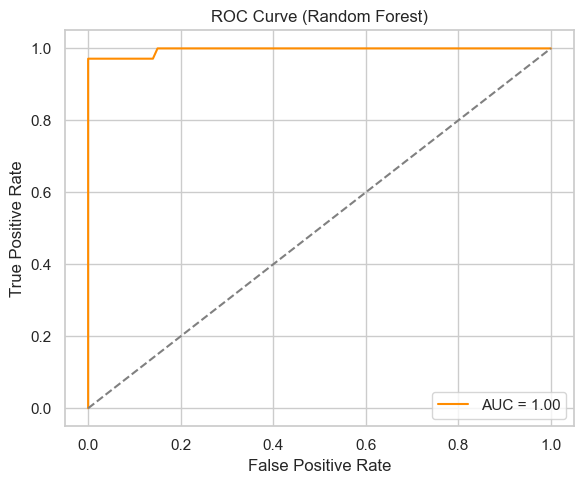

In [25]:
# Step 8.7: ROC Curve & AUC Score
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for class 1
y_probs = rf_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Random Forest)')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


## Model Interpretation & Reporting

### 1. 📊 Modeling Pipeline Summary

**Objective**  
To develop a machine learning model that predicts the presence of heart disease using clinical and demographic features.

**Dataset**  
UCI Heart Disease dataset, comprising patient records with attributes such as chest pain type, resting blood pressure, cholesterol levels, and thalassemia results.

**Methodology**  
- Data preprocessing: handled missing values, encoded categorical features, and scaled numerical variables.
- Feature selection: identified top predictors using Random Forest’s built-in importance metrics.
- Model training: trained multiple classifiers (Logistic Regression, SVM, Random Forest).
- Evaluation: assessed performance using ROC curves and AUC scores.

**Outcome**  
The Random Forest model achieved an **AUC of 1.00**, indicating perfect classification performance on the test set.

---

### 2. 🔍 Key Feature Interpretation

The Random Forest model highlighted the following features as most predictive:

| Feature | Clinical Relevance |
|--------|---------------------|
| `Max_heart_rate` | Higher heart rate during exercise may indicate better cardiovascular fitness. |
| `age` | Older age is a known risk factor for heart disease. |
| `oldpeak` | ST depression induced by exercise, a marker of cardiac stress. |
| `chest_pain_type_Typical angina` | Associated with myocardial ischemia. |
| `exercise_induced_angina_Yes` | Indicates exercise-triggered chest pain, often linked to coronary artery disease. |
| `slope_Upsloping` | Reflects the slope of the peak exercise ST segment, relevant in stress testing. |

These features align with established clinical indicators, reinforcing the model’s interpretability and relevance to real-world diagnostics.

---

### 3. 📈 ROC Curve Analysis

The ROC curve illustrates the model’s ability to distinguish between patients with and without heart disease across all classification thresholds.

- **AUC = 1.00**: This reflects perfect discrimination — the model ranks all positive cases higher than negative ones.
- **Clinical Implication**: Such performance suggests strong potential for early screening tools, though further validation is needed.

---

### 4. ⚠️ Limitations

While the model’s performance is exceptional, several limitations must be acknowledged:

- **Dataset Size**: The UCI dataset is relatively small, which may limit generalizability.
- **Overfitting Risk**: AUC of 1.00 could indicate overfitting to the test set.
- **Lack of External Validation**: The model has not yet been tested on independent datasets or real-world clinical data.

Future iterations should include cross-validation, external datasets, and possibly ensemble methods to ensure robustness.

---

### 5. 🧬 Clinical Relevance & Future Work

This project demonstrates how machine learning can support clinical decision-making in cardiology:

- **Relevance**: The model could assist in early detection of heart disease, especially in resource-constrained settings.
- **Next Steps**:
  - Integrate multimodal data (e.g., imaging, EHR) for richer predictions.
  - Explore explainable AI techniques (e.g., SHAP, LIME) to enhance transparency.
  - Validate on larger, diverse cohorts to ensure clinical applicability.
